# Punto no2

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
import numpy as np

df = pd.read_csv("../data/DEPARTMENTS.csv")

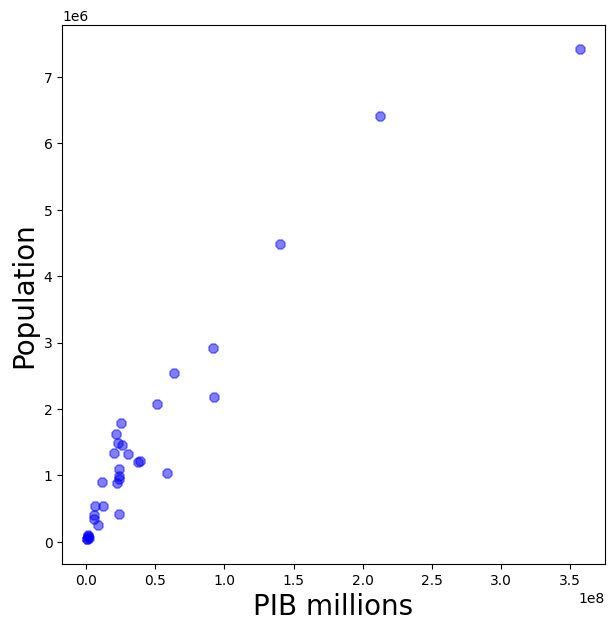

In [50]:
figura = plt.figure(figsize = (7, 7))
plt.scatter(df['PIB millones'], df['Población'], 
            marker = "8", s = 50, color = "blue", alpha = 0.5)
plt.xlabel("PIB millions", fontsize = 20, color = "Black")
plt.ylabel("Population", fontsize = 20, color = "Black")
plt.show()

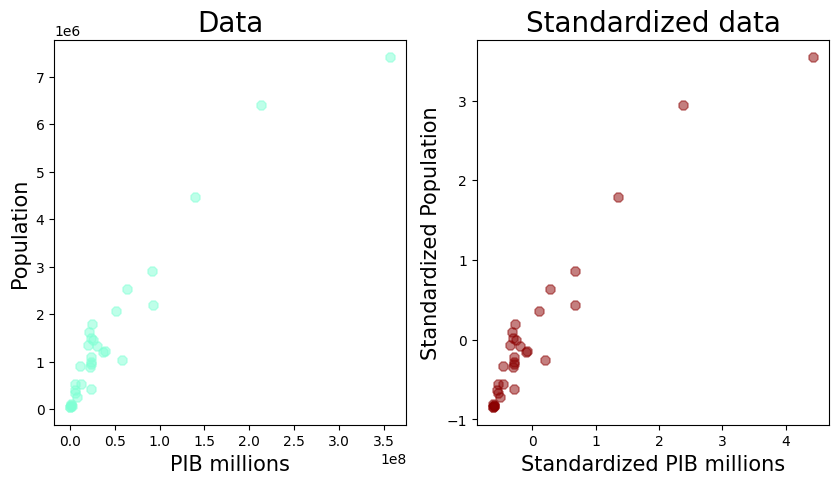

In [51]:
from sklearn.preprocessing import StandardScaler

# Visual code
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Data", fontsize=20)
ax1.scatter(df["PIB millones"], df["Población"], marker="8", s=50, color="aquamarine", alpha=0.5)
ax1.set_xlabel("PIB millions", fontsize=15)
ax1.set_ylabel("Population", fontsize=15)

# Standardize the data
columns = ["PIB millones", "Población"]
data = df[columns]
scaled_data = pd.DataFrame(StandardScaler().fit_transform(data), columns=columns)

ax2.set_title("Standardized data", fontsize=20)
ax2.scatter(scaled_data["PIB millones"], scaled_data["Población"], marker="8", s=50, color="darkred", alpha=0.5)
ax2.set_xlabel("Standardized PIB millions", fontsize=15)
ax2.set_ylabel("Standardized Population", fontsize=15)

plt.show()

## ¿Cuál es la matriz de covarianza?

In [52]:
covariance = scaled_data.cov()
covariance

,PIB millones,Población
PIB millones,1.031250,0.985102
Población,0.985102,1.031250


## ¿Cuáles son los eigen values y eigenvectores?

In [53]:
eigenvalues, eigenvectors = eig(covariance)

blue_vector = eigenvectors[:, 0]
red_vector = eigenvectors[:, 1]

print("Red Eigenvector:", red_vector, "Eigenvalue:", eigenvalues[1])
print("Blue Eigenvector:", blue_vector, "Eigenvalue:", eigenvalues[0])

Red Eigenvector: [-0.70710678 -0.70710678] Eigenvalue: 2.0163518495550883
Blue Eigenvector: [-0.70710678  0.70710678] Eigenvalue: 0.04614815044491116


## ¿Cuál es la varianza explicada por el eigenvalue?

In [54]:
# Variance
variance = np.sum(eigenvalues)

# Explained variance
explained_variance = (eigenvalues / variance) * 100

for i, eigen in enumerate(explained_variance):
    print(f"Eigenvalue {i+1}: Varianza explicada = {eigen:.2f}%")

Eigenvalue 1: Varianza explicada = 2.24%
Eigenvalue 2: Varianza explicada = 97.76%


## ¿Cuál es la matriz proyectada?

In [55]:
# Build the matrix
projected_matrix = np.column_stack((red_vector, blue_vector))

# show the projected matrix
print("Matrix:")
print(projected_matrix)

Matrix:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
